# Behaviorial Cloning Project

[![Udacity - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)

Overview
---
In this project, you will use what you've learned about deep neural networks and convolutional neural networks to clone driving behavior. You will train, validate and test a model using Keras. The model will output a steering angle to an autonomous vehicle.

We have provided a simulator where you can steer a car around a track for data collection. You'll use image data and steering angles to train a neural network and then use this model to drive the car autonomously around the track.

We also want you to create a detailed writeup of the project. Check out the [writeup template](https://github.com/udacity/CarND-Behavioral-Cloning-P3/blob/master/writeup_template.md) for this project and use it as a starting point for creating your own writeup. The writeup can be either a markdown file or a pdf document.

To meet specifications, the project will require submitting five files: 
* model.py (script used to create and train the model)
* drive.py (script to drive the car - feel free to modify this file)
* model.h5 (a trained Keras model)
* a report writeup file (either markdown or pdf)
* video.mp4 (a video recording of your vehicle driving autonomously around the track for at least one full lap)

This README file describes how to output the video in the "Details About Files In This Directory" section.

Creating a Great Writeup
---
A great writeup should include the [rubric points](https://review.udacity.com/#!/rubrics/432/view) as well as your description of how you addressed each point.  You should include a detailed description of the code used (with line-number references and code snippets where necessary), and links to other supporting documents or external references.  You should include images in your writeup to demonstrate how your code works with examples.  

All that said, please be concise!  We're not looking for you to write a book here, just a brief description of how you passed each rubric point, and references to the relevant code :). 

You're not required to use markdown for your writeup.  If you use another method please just submit a pdf of your writeup.

The Project
---
The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior 
* Design, train and validate a model that predicts a steering angle from image data
* Use the model to drive the vehicle autonomously around the first track in the simulator. The vehicle should remain on the road for an entire loop around the track.
* Summarize the results with a written report

### Dependencies
This lab requires:

* [CarND Term1 Starter Kit](https://github.com/udacity/CarND-Term1-Starter-Kit)

The lab enviroment can be created with CarND Term1 Starter Kit. Click [here](https://github.com/udacity/CarND-Term1-Starter-Kit/blob/master/README.md) for the details.

The following resources can be found in this github repository:
* drive.py
* video.py
* writeup_template.md

The simulator can be downloaded from the classroom. In the classroom, we have also provided sample data that you can optionally use to help train your model.

## Details About Files In This Directory

### `drive.py`

Usage of `drive.py` requires you have saved the trained model as an h5 file, i.e. `model.h5`. See the [Keras documentation](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) for how to create this file using the following command:
```sh
model.save(filepath)
```

Once the model has been saved, it can be used with drive.py using this command:

```sh
python drive.py model.h5
```

The above command will load the trained model and use the model to make predictions on individual images in real-time and send the predicted angle back to the server via a websocket connection.

Note: There is known local system's setting issue with replacing "," with "." when using drive.py. When this happens it can make predicted steering values clipped to max/min values. If this occurs, a known fix for this is to add "export LANG=en_US.utf8" to the bashrc file.

#### Saving a video of the autonomous agent

```sh
python drive.py model.h5 run1
```

The fourth argument, `run1`, is the directory in which to save the images seen by the agent. If the directory already exists, it'll be overwritten.

```sh
ls run1

[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_424.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_451.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_477.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_528.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_573.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_618.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_697.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_723.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_749.jpg
[2017-01-09 16:10:23 EST]  12KiB 2017_01_09_21_10_23_817.jpg
...
```

The image file name is a timestamp of when the image was seen. This information is used by `video.py` to create a chronological video of the agent driving.

### `video.py`

```sh
python video.py run1
```

Creates a video based on images found in the `run1` directory. The name of the video will be the name of the directory followed by `'.mp4'`, so, in this case the video will be `run1.mp4`.

Optionally, one can specify the FPS (frames per second) of the video:

```sh
python video.py run1 --fps 48
```

Will run the video at 48 FPS. The default FPS is 60.

#### Why create a video

1. It's been noted the simulator might perform differently based on the hardware. So if your model drives succesfully on your machine it might not on another machine (your reviewer). Saving a video is a solid backup in case this happens.
2. You could slightly alter the code in `drive.py` and/or `video.py` to create a video of what your model sees after the image is processed (may be helpful for debugging).


# Solution

## Data preprocessing

In [3]:
import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)                  # Skip header
    for line in reader:
        lines.append(line)
    
# Update the path in the csv log file
images = []
measurements = []
for line in lines:
    # Image
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = 'data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    # Measurement
    measurement = float(line[3])
    measurements.append(measurement)
    
X_train = np.array(images)
y_train = np.array(measurements)
    

## Visualize Training Data

Number of examples = 8036
Image data shape = (160, 320, 3)
Maximum steering angle = 1.0
Minimum steering angle = -0.9426954
Average steering angle = 0.00406964406483


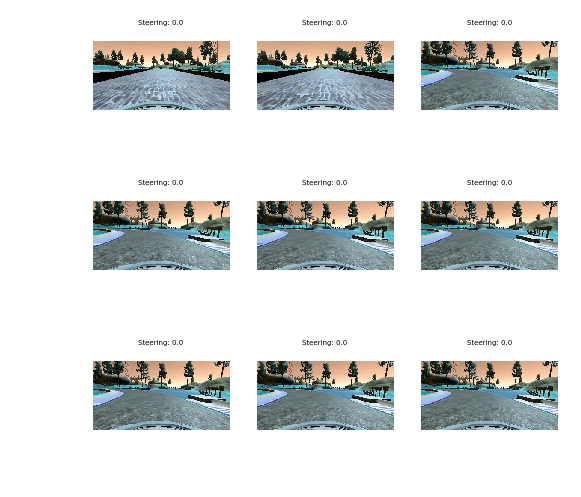

In [22]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# plt.rcParams['savefig.dpi'] = 200
# plt.rcParams['figure.dpi'] = 200


# Number of training examples
n_train = X_train.shape[0]
# Shape of the image
image_shape = X_train.shape[1:]

print("Number of examples =", n_train)
print("Image data shape =", image_shape)
print("Maximum steering angle =", np.max(y_train))
print("Minimum steering angle =", np.min(y_train))
print("Average steering angle =", np.mean(y_train))

# Plot some random images
index = np.random.randint(0, n_train, size=9)
plt.figure(figsize=(3,3), dpi=200)
for index in range(len(index)):
    ax = plt.subplot(3, 3, index + 1)
    image = X_train[index].squeeze()
    plt.imshow(image)
    ax.axis('off')
    ax.set_title("Steering: " + str(y_train[index]), fontsize=2.5)

plt.show()

## Build Network

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

Using TensorFlow backend.


In [ ]:
# Simple linear model
model1 = Sequential()
model1.add(Flatten(input_shape=image_shape))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam')
history1 = model1.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=10, verbose=1)

# Plot the training and validation loss for each epoch
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

# Save model for testing
model1.save('model.h5')